## Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

**train (8523) and test (5681)**

In [1]:
# Importing Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
# Training Data Set
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

In [3]:
# Dimensions of Data
train.shape, test.shape

((8523, 12), (5681, 11))

### EDA

    1. UniVariate Analysis
    2. Bi-Variate Analysis

In [4]:
train.head()

# Item Visibility has 0s which is imperfect
# Outlet Establishment Year Might not be adding to model, would make model try to overfit


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


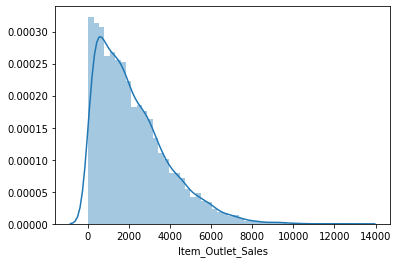

In [5]:
# Target Variable
sns.distplot(train.Item_Outlet_Sales)
plt.show()

In [6]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

#### First Submission - Base Model

Average

In [7]:
train.Item_Outlet_Sales.mean()

2181.2889135750365

In [8]:
# Submission File
solution = pd.DataFrame({'Item_Identifier' : test.Item_Identifier,
                         'Outlet_Identifier' : test.Outlet_Identifier,
                         'Item_Outlet_Sales' : train.Item_Outlet_Sales.mean()})

In [9]:
solution.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914


In [10]:
# Export to csv
solution.to_csv('BaseModel.csv',index=False) #Name with Extension, Index-False

In [11]:
cd

C:\Users\admin


#### Base Model RMSE : 1773.825

### Uni-Variate Analysis

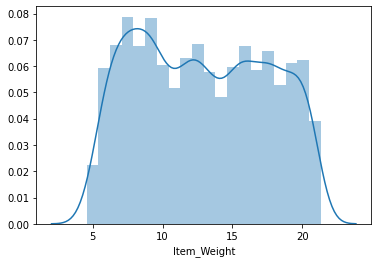

In [12]:
# Item_Weight
sns.distplot(train.Item_Weight.dropna())

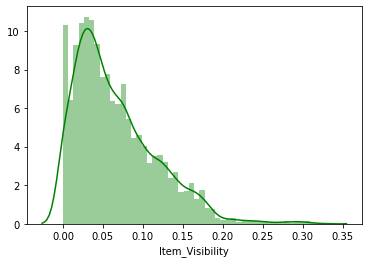

In [13]:
# Item_Visibility
sns.distplot(train.Item_Visibility,color='g')

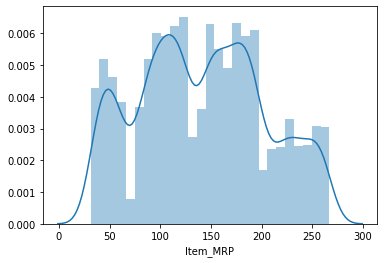

In [14]:
# Item_MRP
sns.distplot(train.Item_MRP)

# Multi-Modal
# Different Data Distributions
# Will Use Bi-Variate Analysis to understand Further

In [15]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
# Single Category - countplot | value_counts then plotting frequency
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
# Fixing the Item Fat Content
train.Item_Fat_Content.replace(['reg','LF','low fat'],['Regular','Low Fat','Low Fat'],inplace=True)
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
# Doing the Same for Test
# Fixing the Item Fat Content
test.Item_Fat_Content.replace(['reg','LF','low fat'],['Regular','Low Fat','Low Fat'],inplace=True)
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

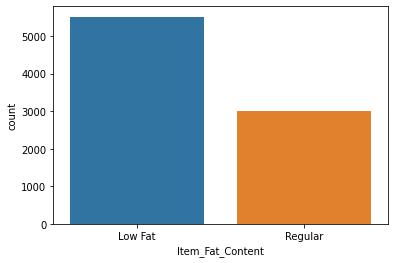

In [19]:
sns.countplot(train.Item_Fat_Content)

In [20]:
# Item Type
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

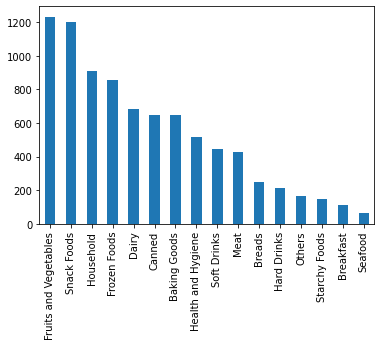

In [21]:
train.Item_Type.value_counts().plot(kind='bar')

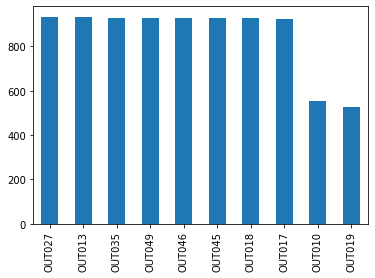

In [22]:
# Outlet Id
train.Outlet_Identifier.value_counts().plot(kind='bar')

# OUT027 has Highest Frequency - Sale will also be higher for this Outlet..

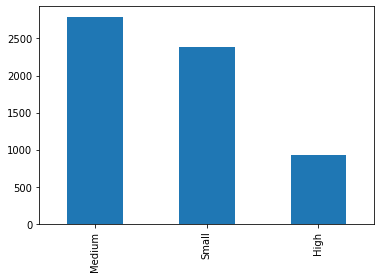

In [23]:
# Outlet Size
train.Outlet_Size.value_counts().plot(kind='bar')

# May be OUT027 - Medium Size

In [24]:
# Outlet Location Type
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [25]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### Summary of Univariate Analysis

* Mean Sales is 2100 dollars and the min and max are 33 and 13000 resp.
* Product Types - Low Fat and Regular
* Top 3 Selling Items - **Fruits and Veggies, Snack Foods and Household Items**
* The Outlet readily available is **Out027**
* Most of the Outlets are **Medium** sized outlet.
* **Tier 3** Location has the highest no of Outlets.
* **S1** is the most seen Outlet Type


### Bi-Variate Analysis
    1. Num vs Num (Pred vs Tgt)
    2. Cat vs Num (Cat vs Tgt)

In [26]:
# Num vs Num

Text(0.5, 1.0, 'Weight vs Sales')

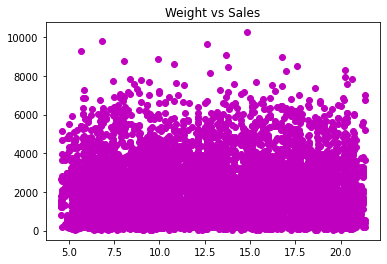

In [27]:
#  Item_Weight vs Sales
plt.scatter(train.Item_Weight, train.Item_Outlet_Sales, color = 'm')
plt.title('Weight vs Sales')

# Inference - No Pattern between Weight and Sales

Text(0.5, 1.0, 'Visibility vs Sales')

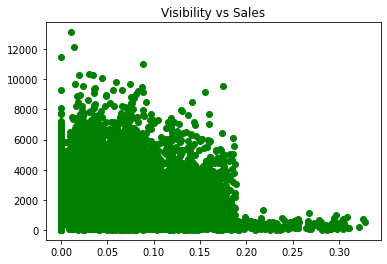

In [28]:
# Item_Visibility vs Sales
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color = 'g')
plt.title('Visibility vs Sales')

# Inference - Bigger the Product Lesser the Sales
# Straight Line on 0 needs fixing

Text(0.5, 1.0, 'MRP vs Sales')

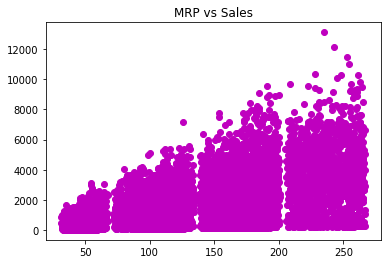

In [29]:
# MRP vs Sales
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, color = 'm')
plt.title('MRP vs Sales')

# Inference - Higher MRP - Lesser Sales

In [30]:
# Cat vs Num

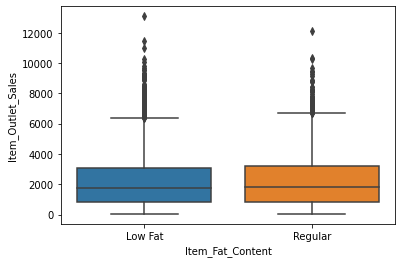

In [31]:
# Item_Fat_Content vs Sales
sns.boxplot(train.Item_Fat_Content,train.Item_Outlet_Sales)

# regular has higher 3rd quartile

In [32]:
# Statistical Summary of Boxplot above

train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,5517.0,2157.711534,1697.973824,33.2900,826.2578,1765.0358,3050.69560,13086.9648
Regular,3006.0,2224.561170,1721.480865,33.9558,857.5504,1844.5989,3198.66965,12117.5600


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

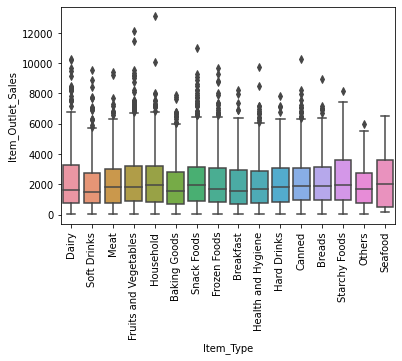

In [33]:
# Item_Type vs Sales
sns.boxplot(train.Item_Type,train.Item_Outlet_Sales)
plt.xticks(rotation=90)

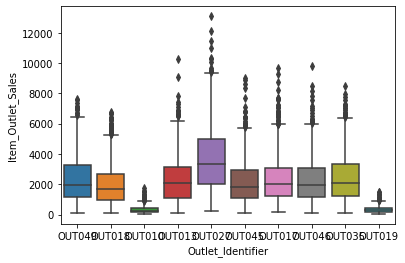

In [34]:
# Outlet_Id vs Sales
sns.boxplot(train.Outlet_Identifier,train.Item_Outlet_Sales)

# Inference - OUT027 & OUT013 have more sales while OUT010 & OUT019 have Least Sales

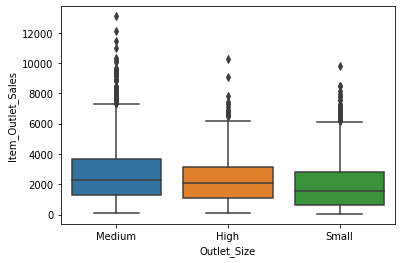

In [35]:
# Outlet_Size vs Sales
sns.boxplot(train.Outlet_Size,train.Item_Outlet_Sales)

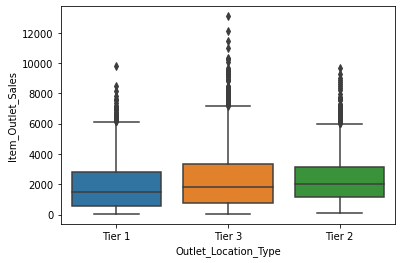

In [36]:
# Outlet_LocationType vs Sales
sns.boxplot(train.Outlet_Location_Type,train.Item_Outlet_Sales)

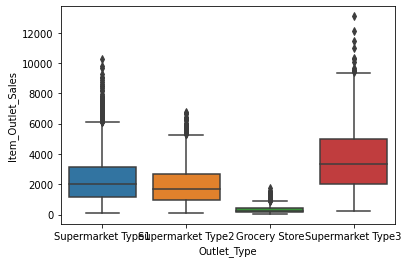

In [37]:
# Outlet_Type vs Sales
sns.boxplot(train.Outlet_Type,train.Item_Outlet_Sales)

### Summary of Bivariate Analysis:

* Low Fat Items sell more than Regular
* No pattern was found between weight and TGT
* We saw interesting pattern between visibility & TGT
* We also saw that there is a straight line at 0 in visibility plot which needs fixing.
* OUT027 & Out013 earns the biggest revenue generator label & Out10 and Out 19 are the slow movers
* S1 and S3 makes lot of money for the business.
* Fast Moving Products are Fruits & Veggies, Snacks, Soft Drinks, Households...


------------------

### Missing Values

In [38]:
train.isnull().sum()

# Item_Weight & Outlet_Size - Same Columns for Test and Train

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [39]:
# Combine Train and Test
combined = pd.concat([train,test],ignore_index=True)

In [40]:
combined.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [41]:
combined.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [42]:
combined[combined.Item_Type == 'Dairy']['Item_Weight'].mean()

13.23835812964935

In [43]:
combined[combined.Item_Identifier == 'NCD19']['Item_Weight']

# Item_Id more valid for filling Item_Weight

4        8.93
522      8.93
802      8.93
2129     8.93
2907     8.93
3428     8.93
8672      NaN
10467    8.93
13900    8.93
Name: Item_Weight, dtype: float64

In [44]:
# lambda
# Way1 :
# miss_values = lambda x:x.fillna(x.mean())
# combined['Item_Weight'] = combined.groupby('Item_Identifier')['Item_Weight'].apply(miss_values)

# Way2 : 
combined['Item_Weight'] = combined.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))


In [45]:
combined.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [46]:
# Handling Outlet_Size Missing Values
combined.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [47]:
combined.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].unique()

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store                [Small]
                      Supermarket Type1    [Medium, Small]
Tier 2                Supermarket Type1       [nan, Small]
Tier 3                Grocery Store                  [nan]
                      Supermarket Type1             [High]
                      Supermarket Type2           [Medium]
                      Supermarket Type3           [Medium]
Name: Outlet_Size, dtype: object

In [48]:
combined.loc[combined.Outlet_Type=="Grocery Store", "Outlet_Size"] = "Small"
combined.loc[combined.Outlet_Type=="Supermarket Type1", "Outlet_Size"] = "Small"


In [49]:
combined.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].unique()

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store         [Small]
                      Supermarket Type1     [Small]
Tier 2                Supermarket Type1     [Small]
Tier 3                Grocery Store         [Small]
                      Supermarket Type1     [Small]
                      Supermarket Type2    [Medium]
                      Supermarket Type3    [Medium]
Name: Outlet_Size, dtype: object

------------------------

### Feature Engineering

In [50]:
combined.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Small,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Small,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,Small,Supermarket Type1


In [51]:
combined.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [52]:
# Deal with Zero Visibility
combined['Item_Visibility'] = combined.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x:x.replace(0,x.mean()))

In [53]:
combined.Item_Visibility.describe()

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

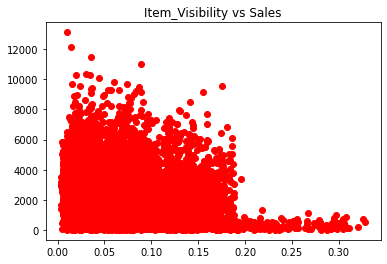

In [54]:
# Item_Visibility vs Sales
plt.scatter(combined.Item_Visibility,combined.Item_Outlet_Sales,c='r')
plt.title('Item_Visibility vs Sales')
plt.show()

In [55]:
combined.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Small,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Small,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,Small,Supermarket Type1


In [56]:
# Item_Type to Perishable/Non-Perishable Type
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [57]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Breakfast', 
               'Canned', 'Breads', 'Starchy Foods', 'Seafood']

def perish(x):
    if x in perishables:
        return 'Perishables'
    else:
        return 'Non Perishables'

# Apply on Item_Type
combined['ItemType_Category'] = combined.Item_Type.apply(perish)

In [58]:
# Outlet_Vintage (Years)
combined['Vintage'] = 2013 - combined.Outlet_Establishment_Year

In [59]:
# Outlet_Identifier
def outlets(x):
    if x == 'OUT027':
        return 'OUT027'
    else:
        return 'Others'
    
combined['Outlets'] = combined['Outlet_Identifier'].apply(outlets)

In [60]:
# Item_Identifier
combined.iloc[0][1][:2]

'FD'

In [61]:
mylist = []

# NC --> Non-Consumable
# FD --> Food
# DR --> Drinks

for i in combined.Item_Identifier:
    mylist.append(i[:2])
    
combined['ItemID_Cat'] = pd.Series(mylist)

In [62]:
combined.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,ItemType_Category,Vintage,Outlets,ItemID_Cat
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Small,Supermarket Type1,Perishables,14,Others,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Non Perishables,4,Others,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Small,Supermarket Type1,Perishables,14,Others,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Perishables,15,Others,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,Small,Supermarket Type1,Non Perishables,26,Others,NC


In [63]:
# Dropping the Variables

df = combined.drop(['Item_Type','Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier'],axis=1)

In [64]:
df.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,ItemType_Category,Vintage,Outlets,ItemID_Cat
0,Low Fat,249.8092,3735.1380,0.016047,9.30,Tier 1,Small,Supermarket Type1,Perishables,14,Others,FD
1,Regular,48.2692,443.4228,0.019278,5.92,Tier 3,Medium,Supermarket Type2,Non Perishables,4,Others,DR
2,Low Fat,141.6180,2097.2700,0.016760,17.50,Tier 1,Small,Supermarket Type1,Perishables,14,Others,FD
3,Regular,182.0950,732.3800,0.017834,19.20,Tier 3,Small,Grocery Store,Perishables,15,Others,FD
4,Low Fat,53.8614,994.7052,0.009780,8.93,Tier 3,Small,Supermarket Type1,Non Perishables,26,Others,NC


In [65]:
# Changing Item Fat Content as per the ItemID
df.loc[df.ItemID_Cat=="NC", "Item_Fat_Content"]="Non Edible"

-----------------

### Splitting

In [66]:
# Split data into train and Test
train.shape, test.shape

((8523, 12), (5681, 11))

In [67]:
newtrain = df[:8523]
newtest = df[8523:].reset_index(drop=True)

In [68]:
newtrain.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,ItemType_Category,Vintage,Outlets,ItemID_Cat
0,Low Fat,249.8092,3735.1380,0.016047,9.30,Tier 1,Small,Supermarket Type1,Perishables,14,Others,FD
1,Regular,48.2692,443.4228,0.019278,5.92,Tier 3,Medium,Supermarket Type2,Non Perishables,4,Others,DR
2,Low Fat,141.6180,2097.2700,0.016760,17.50,Tier 1,Small,Supermarket Type1,Perishables,14,Others,FD
3,Regular,182.0950,732.3800,0.017834,19.20,Tier 3,Small,Grocery Store,Perishables,15,Others,FD
4,Non Edible,53.8614,994.7052,0.009780,8.93,Tier 3,Small,Supermarket Type1,Non Perishables,26,Others,NC


In [69]:
newtest.drop('Item_Outlet_Sales',axis=1,inplace=True)
newtest.head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,ItemType_Category,Vintage,Outlets,ItemID_Cat
0,Low Fat,107.8622,0.007565,20.750,Tier 1,Small,Supermarket Type1,Non Perishables,14,Others,FD
1,Regular,87.3198,0.038428,8.300,Tier 2,Small,Supermarket Type1,Perishables,6,Others,FD
2,Non Edible,241.7538,0.099575,14.600,Tier 3,Small,Grocery Store,Non Perishables,15,Others,NC
3,Low Fat,155.0340,0.015388,7.315,Tier 2,Small,Supermarket Type1,Non Perishables,6,Others,FD
4,Regular,234.2300,0.118599,13.600,Tier 3,Medium,Supermarket Type3,Perishables,28,OUT027,FD


In [70]:
newtrain.shape,newtest.shape

((8523, 12), (5681, 11))

-------------------

### Model Building

In [71]:
# dummies
dummytrain = pd.get_dummies(newtrain,drop_first=True)
dummytest = pd.get_dummies(newtest,drop_first=True)

In [72]:
dummytrain.shape,dummytest.shape

((8523, 17), (5681, 16))

In [73]:
# Validation Set comes from Train Set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
ridge = Ridge(alpha=0.5,normalize=True)
lasso = Lasso(alpha=0.5,normalize=True)

# Define x and y
X = dummytrain.drop('Item_Outlet_Sales',axis=1)
y = dummytrain.Item_Outlet_Sales

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.20,random_state = 1)

# Def a Function that will return RMSE

def rmse(y_test,pred):
    RMSE = np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE :',np.round(RMSE,4))
    
pred_lr = lr.fit(xtrain,ytrain).predict(xtest)
rmse(ytest,pred_lr)

RMSE : 1142.927


In [74]:
# Building Linear Model
pred_reg = lr.fit(X,y).predict(dummytest)

# Submission Dataframe

solution = pd.DataFrame({'Item_Identifier' : test.Item_Identifier,
                         'Outlet_Identifier' : test.Outlet_Identifier,
                         'Item_Outlet_Sales' : pred_reg})

# Export to csv
solution.to_csv('LinearModel.csv',index=False) #Name with Extension, Index-False

In [75]:
# Building Bagging Model
from sklearn.ensemble import BaggingRegressor

bagg = BaggingRegressor()
pred_bagg = bagg.fit(X,y).predict(dummytest)

# Submission Dataframe

solution = pd.DataFrame({'Item_Identifier' : test.Item_Identifier,
                         'Outlet_Identifier' : test.Outlet_Identifier,
                         'Item_Outlet_Sales' : pred_bagg})

# Export to csv
solution.to_csv('Bagging_Model.csv',index=False) #Name with Extension, Index-False

# RMSE = 1280
# Intercept+Slope - Showing

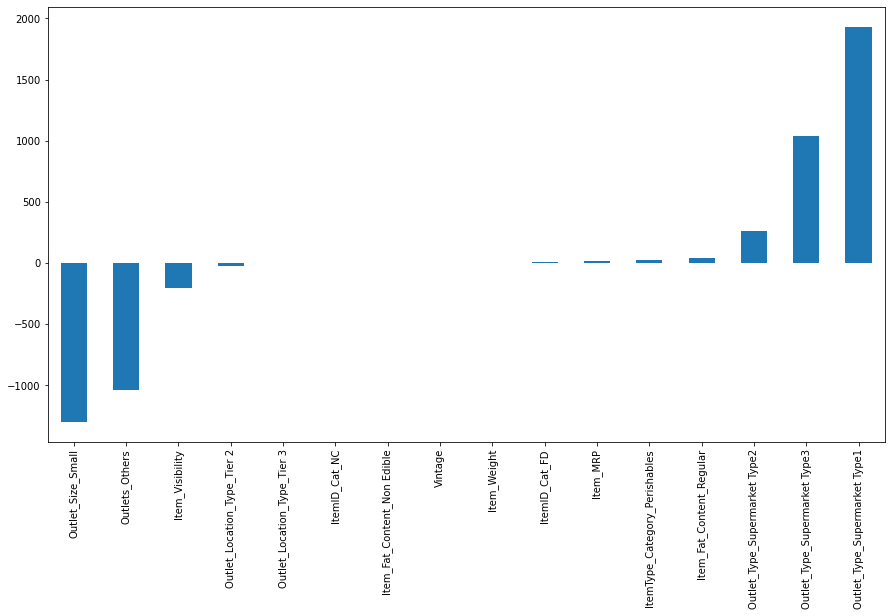

In [79]:
# Regression Coefficient

pd.Series(lr.coef_,X.columns).sort_values().plot(kind = 'bar',figsize=(15,8))
plt.show()

#### Thus Not able to Fit Linear Regression
* Some Features are getting more importance and others not, so need to introduce Regularization.
* 2Types : L1,L2 --> Lasso,Ridge

In [84]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

# Predictor and Target
X = dummytrain.drop('Item_Outlet_Sales',axis=1)
y = dummytrain.Item_Outlet_Sales

# train-test split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.20,random_state = 42)

## Lasso Regression

In [87]:
lasso = Lasso(alpha=0.1,normalize=True) # Normalize =  True --> Model to give Equal Weightage to all

pred_train = lasso.fit(xtrain,ytrain).predict(xtrain)
pred_test = lasso.fit(xtrain,ytrain).predict(xtest)

print('Train RMSE :',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('Test RMSE :',np.sqrt(mean_squared_error(ytest,pred_test)))

Train RMSE : 1143.930579212967
Test RMSE : 1067.9621266477911


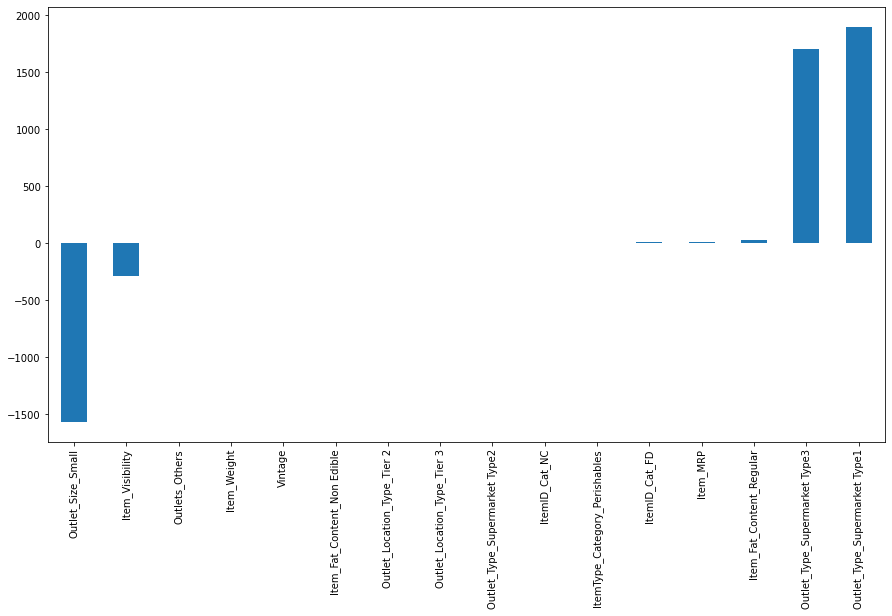

In [88]:
# Plot Coefficients
pd.Series(lasso.coef_,xtrain.columns).sort_values().plot(kind = 'bar',figsize=(15,8))
plt.show()

# As we increase alpha, More features dissolve from the model

In [104]:
# Function that tells me which predictors are 0s basis alpha values

def lassos(alphas):
    df = pd.DataFrame()
    
    df['Features'] = xtrain.columns
    
    #loop for all alphas
    for i in alphas:
        lasso = Lasso(alpha=i)
        lasso.fit(xtrain,ytrain)
        
        col_name = 'Alpha = %.3f' %i
        df[col_name] = np.round(lasso.coef_,3)
    return df

In [114]:
# [0.1, 0.01, 0.001, 0.5, 0.99, 1, 2, 5, 10]
lassos([0.1, 0.01, 0.001, 0.5, 0.99, 1, 2, 5, 10, 20, 30, 50])

,Features,Alpha = 0.100,Alpha = 0.010,Alpha = 0.001,Alpha = 0.500,Alpha = 0.990,Alpha = 1.000,Alpha = 2.000,Alpha = 5.000,Alpha = 10.000,Alpha = 20.000,Alpha = 30.000,Alpha = 50.000
0,Item_MRP,15.634,15.634,15.634,15.637,15.640,15.640,15.641,15.642,15.638,15.632,15.625,15.613
1,Item_Visibility,-296.297,-332.862,-336.522,-133.250,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
2,Item_Weight,-1.257,-1.281,-1.283,-1.156,-1.064,-1.064,-1.026,-0.920,-0.756,-0.340,-0.000,-0.000
3,Vintage,-0.802,-0.687,-0.676,-0.763,-0.835,-0.839,-0.627,-0.607,-0.585,-0.544,-0.501,-0.408
4,Item_Fat_Content_Non Edible,0.000,0.000,-41.456,0.643,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000
5,Item_Fat_Content_Regular,44.759,45.192,45.236,42.941,40.963,40.934,38.150,29.582,8.185,0.000,0.000,0.000
6,Outlet_Location_Type_Tier 2,6.178,7.819,7.984,3.975,0.185,0.096,0.000,0.000,0.000,0.000,0.000,0.000
7,Outlet_Location_Type_Tier 3,15.860,15.754,15.743,11.553,7.257,7.195,0.000,0.000,0.000,0.000,0.000,0.000
8,Outlet_Size_Small,-1547.691,-1064.326,-1015.990,-1611.286,-1609.915,-1609.699,-1600.859,-1553.723,-1474.773,-1316.756,-1158.801,-842.964
9,Outlet_Type_Supermarket Type1,1958.808,1958.833,1958.836,1958.628,1955.587,1955.402,1937.108,1885.166,1798.493,1624.835,1451.128,1103.688


In [125]:
# Finding RMSE and R2 Behaviour basis  different Alphas
from sklearn.metrics import r2_score
rmse_train = []
rmse_test = []
al = []
r2 = []

alphas = [0.1, 0.09 ,0.01, 0.001, 0.5, 0.99, 1, 2, 5, 10, 20, 30, 50]

for i in alphas:
    lasso = Lasso(alpha=i,normalize=True)
    al.append(i)
    pred_train = lasso.fit(xtrain,ytrain).predict(xtrain)
    pred_test = lasso.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    r2.append(r2_score(ytest,pred_test))

In [126]:
lasso_df = pd.DataFrame({'Alpha' : al,
                         'RSq' : r2,
                         'RMSE_Train' : rmse_train,
                         'RMSE_Test' : rmse_test})
lasso_df.sort_values('RSq',ascending=False)

# Higher Values of Alpha lesser the Model Complexity
# R2 Reduces - Error Increases
# This is Point where Prediction power is Compromised

,Alpha,RSq,RMSE_Train,RMSE_Test
1,0.090,0.580380,1143.871859,1067.949044
0,0.100,0.580370,1143.930579,1067.962127
2,0.010,0.580115,1143.584738,1068.286561
3,0.001,0.580005,1143.577496,1068.425864
4,0.500,0.576838,1150.402300,1072.446055
5,0.990,0.563019,1169.002294,1089.816563
6,1.000,0.562625,1169.503565,1090.308802
7,2.000,0.500696,1242.768202,1164.943143
8,5.000,0.311961,1438.159537,1367.504685
9,10.000,0.089069,1641.509922,1573.493958


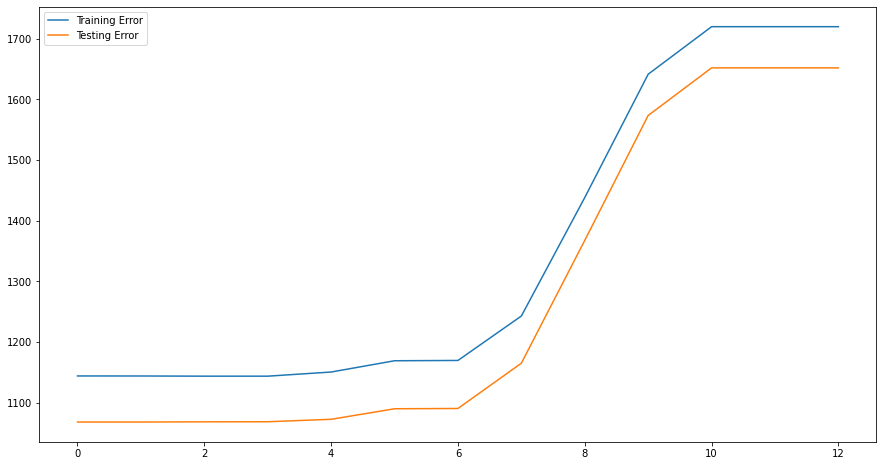

In [127]:
plt.figure(figsize=(15,8))
plt.plot(lasso_df.RMSE_Train,label = 'Training Error')
plt.plot(lasso_df.RMSE_Test,label = 'Testing Error')
plt.legend()
plt.show()

In [128]:
# If Test Error is Higher Than Training Error
# You need to increase test %age
# Apply CV to find the Same

lassocv = LassoCV(cv=10,normalize=True,max_iter=1000)

pred_train = lassocv.fit(xtrain,ytrain).predict(xtrain)
pred_test = lassocv.fit(xtrain,ytrain).predict(xtest)

print('Train Error :',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('Test Error :',np.sqrt(mean_squared_error(ytest,pred_test)))


Train Error : 1143.83477236959
Test Error : 1067.94383430177


In [129]:
lassocv.alpha_

0.08306921850519113

* Seen the Effect of different Alpha values with Coefficients
* Saw the effect of different Alpha values with R2Score and RMSE
* Applied Lassocv to find same alpha value

## Ridge Regression

In [130]:
ridge = Ridge(alpha=1,normalize=True)


pred_train = ridge.fit(xtrain,ytrain).predict(xtrain)
pred_test = ridge.fit(xtrain,ytrain).predict(xtest)

print('Train RMSE :',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('Test RMSE :',np.sqrt(mean_squared_error(ytest,pred_test)))

Train RMSE : 1339.9589596946616
Test RMSE : 1262.3136402003865


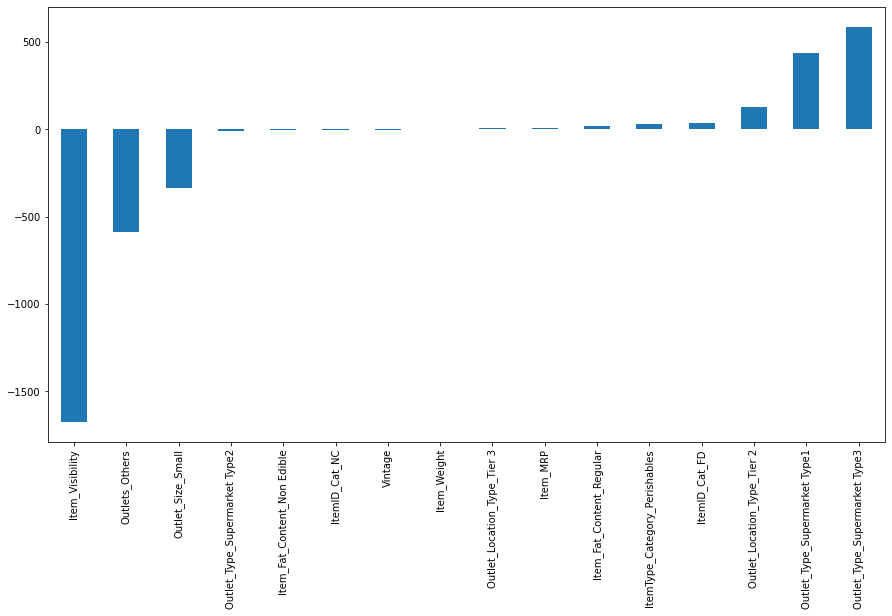

In [131]:
# Plot Coefficients
pd.Series(ridge.coef_,xtrain.columns).sort_values().plot(kind = 'bar',figsize=(15,8))
plt.show()

# As we increase alpha, More features dissolve from the model

In [132]:
# Function that tells me which predictors are 0s basis alpha values

def ridges(alphas):
    df = pd.DataFrame()
    
    df['Features'] = xtrain.columns
    
    #loop for all alphas
    for i in alphas:
        ridge = Ridge(alpha=i)
        ridge.fit(xtrain,ytrain)
        
        col_name = 'Alpha = %.3f' %i
        df[col_name] = np.round(ridge.coef_,3)
    return df

In [133]:
ridges([0.1, 0.01, 0.5, 1, 2, 5, 10])

,Features,Alpha = 0.100,Alpha = 0.010,Alpha = 0.500,Alpha = 1.000,Alpha = 2.000,Alpha = 5.000,Alpha = 10.000
0,Item_MRP,15.634,15.634,15.634,15.634,15.634,15.634,15.635
1,Item_Visibility,-335.664,-336.798,-330.779,-325.002,-314.425,-288.775,-259.076
2,Item_Weight,-1.283,-1.283,-1.282,-1.280,-1.277,-1.268,-1.258
3,Vintage,-0.679,-0.675,-0.697,-0.720,-0.764,-0.891,-1.086
4,Item_Fat_Content_Non Edible,11.228,11.231,11.214,11.196,11.157,11.032,10.801
5,Item_Fat_Content_Regular,45.233,45.240,45.206,45.173,45.110,44.937,44.686
6,Outlet_Location_Type_Tier 2,8.062,8.007,8.303,8.605,9.211,11.037,14.100
7,Outlet_Location_Type_Tier 3,15.797,15.748,16.018,16.292,16.832,18.399,20.855
8,Outlet_Size_Small,-1313.876,-1314.127,-1312.757,-1311.354,-1308.538,-1300.050,-1285.945
9,Outlet_Type_Supermarket Type1,1958.420,1958.794,1956.750,1954.653,1950.434,1937.643,1916.193


In [138]:
# Finding RMSE and R2 Behaviour basis  different Alphas
from sklearn.metrics import r2_score
rmse_train = []
rmse_test = []
al = []
r2 = []

alphas = [0.1, 0.09 ,0.01, 0.001, 0.5, 0.99, 1, 2, 5, 10, 20, 30, 50]

for i in alphas:
    ridge = Ridge(alpha=i,normalize=True)
    al.append(i)
    pred_train = ridge.fit(xtrain,ytrain).predict(xtrain)
    pred_test = ridge.fit(xtrain,ytrain).predict(xtest)
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    r2.append(r2_score(ytest,pred_test))

In [139]:
ridge_df = pd.DataFrame({'Alpha' : al,
                         'RSq' : r2,
                         'RMSE_Train' : rmse_train,
                         'RMSE_Test' : rmse_test})
ridge_df.sort_values('RSq',ascending=False)

# Higher Values of Alpha lesser the Model Complexity
# R2 Reduces - Error Increases
# This is Point where Prediction power is Compromised

,Alpha,RSq,RMSE_Train,RMSE_Test
2,0.010,0.580370,1143.789921,1067.961214
3,0.001,0.580047,1143.579677,1068.372136
1,0.090,0.574081,1154.896164,1075.933896
0,0.100,0.572619,1156.947875,1077.779004
4,0.500,0.495541,1250.688407,1170.941119
5,0.990,0.415144,1338.485913,1260.801987
6,1.000,0.413741,1339.958960,1262.313640
7,2.000,0.307866,1446.331438,1371.568076
8,5.000,0.172892,1570.778225,1499.351560
9,10.000,0.099184,1634.557714,1564.733827


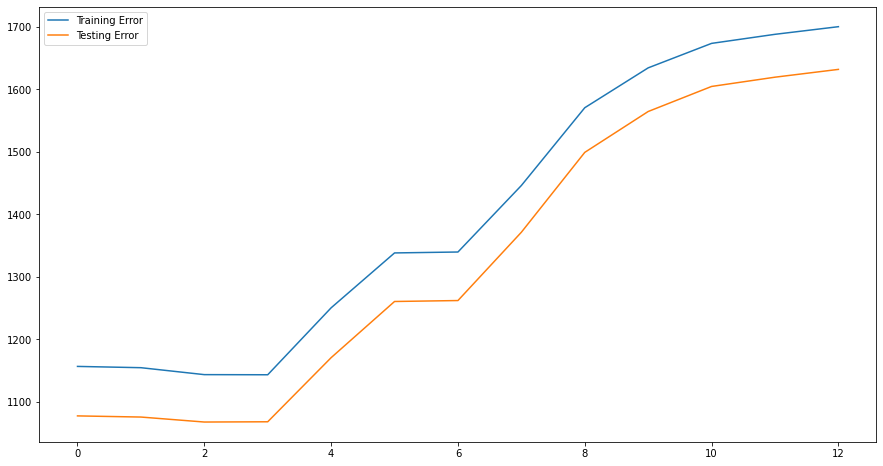

In [140]:
plt.figure(figsize=(15,8))
plt.plot(ridge_df.RMSE_Train,label = 'Training Error')
plt.plot(ridge_df.RMSE_Test,label = 'Testing Error')
plt.legend()
plt.show()

In [142]:
# If Test Error is Higher Than Training Error
# You need to increase test %age
# Apply CV to find the Same

ridgecv = RidgeCV(cv=10,normalize=True)

pred_train = ridgecv.fit(xtrain,ytrain).predict(xtrain)
pred_test = ridgecv.fit(xtrain,ytrain).predict(xtest)

print('Train Error :',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('Test Error :',np.sqrt(mean_squared_error(ytest,pred_test)))


Train Error : 1156.9478754534744
Test Error : 1077.779004372941


In [143]:
ridgecv.alpha_

0.1

## Elastic Net Regression

In [149]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.000001,normalize=True,max_iter=1000)

pred_train = enet.fit(xtrain,ytrain).predict(xtrain)
pred_test = enet.fit(xtrain,ytrain).predict(xtest)

print('Train Error :', np.sqrt(mean_squared_error(ytrain,pred_train)))
print('Test Error :', np.sqrt(mean_squared_error(ytest,pred_test)))

Train Error : 1143.6031595269944
Test Error : 1068.2214542755016


                **Enet Error : LR_Error + Ridge_Penalty*Lambda + Lasso_Penalty*Lambda**

In [160]:
# GridSearch CV

from sklearn.model_selection import GridSearchCV


alphas = {'alpha':[0.1,0.001,1,2,5]}

grid = GridSearchCV(estimator=ElasticNet(),param_grid=alphas,cv = 5) #Estimator --> ElasticNet/Ridge/Lasso
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.001, 1, 2, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [161]:
grid.best_params_

{'alpha': 0.001}